In [0]:
from scipy.interpolate import griddata
import numpy as np
import operator
from google.colab import files
import pandas as pd

In [0]:
uploaded = files.upload()

Saving MainDataset2.csv to MainDataset2 (3).csv


In [0]:
data = pd.read_csv('MainDataset2.csv')

In [0]:

def distance(lat1,long1,lat2,long2):
  return ((lat1-lat2)**2 + (long1-long2)**2)**-2

def distance2(lat1,long1,lat2,long2):
  return abs(lat1-lat2) + abs(long1-long2)


def itsOkaytoAddZero(lat,long,location):
  for [lat2,long2] in location:
    if distance(lat,long,lat2,long2) < 0.001:
      print('Not included')
      print(distance(lat,long,lat2,long2))
      return False
  return True


def itsOkaytoAddZero2(lat,long,location):
  for [lat2,long2] in location:
    if distance2(lat,long,lat2,long2) < 0.035:
      print('Not included')
      print(distance(lat,long,lat2,long2))
      return False
  return True

In [6]:
locationM = []
locationR = []
locationDV = []
locationT = []
locationF = []
locationD = []

lat = []
long = []

latM = []
longM = []
latR = []
longR = []
latDV = []
longDV = []
latT = []
longT = []
latF = []
longF = []
latD = []
longD = []


zM = []
zR = []
zDV = []
zT = []
zF = []
zD = []


for i,row in data.iterrows():
  roundedLat = row[4]
  roundedLong = row[5]
  lat += [roundedLat]
  long += [roundedLong]
  if row[6] == 'Murder':
    latM += [roundedLat]
    longM += [roundedLong]
    locationM += [[roundedLat,roundedLong]]
    zM += [100]
  elif row[6] == 'Rape':
    latR += [roundedLat]
    longR += [roundedLong]
    locationR += [[roundedLat,roundedLong]]
    zR += [100]
  elif row[6] == 'Domestic Violence':
    latDV += [roundedLat]
    longDV += [roundedLong]
    locationDV += [[roundedLat,roundedLong]]
    zDV += [100]
  elif row[6] == 'Theft':
    latT += [roundedLat]
    longT += [roundedLong]
    locationT += [[roundedLat,roundedLong]]
    zT += [100]
  elif row[6] == 'Fraud':
    latF += [roundedLat]
    longF += [roundedLong]
    locationF += [[roundedLat,roundedLong]]
    zF += [100]
  elif row[6] == 'Drugs':
    latD += [roundedLat]
    longD += [roundedLong]
    locationD += [[roundedLat,roundedLong]]
    zD += [100]
    
    
minLat = sorted(lat)[2]
maxLat = sorted(lat)[-3]
minLong = sorted(long)[3]
maxLong = sorted(long)[-3]


zeroLat = np.arange(minLat,maxLat,0.05)
zeroLong = np.arange(minLong,maxLong,0.05)
for lt in zeroLat:
  for lng in zeroLong:
    if itsOkaytoAddZero2(lt,lng,locationM):
      locationM += [[lt,lng]]
      zM += [0]
    if itsOkaytoAddZero(lt,lng,locationR):
      locationR += [[lt,lng]]
      zR += [0]
    if itsOkaytoAddZero(lt,lng,locationDV):
      locationDV += [[lt,lng]]
      zDV += [0]
    if itsOkaytoAddZero(lt,lng,locationT):
      locationT += [[lt,lng]]
      zT += [0]
    if itsOkaytoAddZero(lt,lng,locationF):
      locationF += [[lt,lng]]
      zF += [0]
    if itsOkaytoAddZero(lt,lng,locationD):
      locationD += [[lt,lng]]
      zD += [0]
    


Not included
15767614.816980455
Not included
1452040.9989568025
Not included
766112775.7213959
Not included
5424135.159867729
Not included
3147038.0935784155
Not included
7846033.331917561
Not included
8230298.364015321
Not included
19072532.428067103
Not included
6747074.579421398
Not included
1147442.087347603
Not included
1778512.2564736048
Not included
815075.4177220853
Not included
12568909.134046592
Not included
17568596.611879434
Not included
4138179.8440232743
Not included
3821932.834064462
Not included
16747749.273052286
Not included
494945700.5810546
Not included
3519870.9445202835
Not included
1525017.9593364631
Not included
2629025.4123880262
Not included
2553228.964135978
Not included
43496922.084570564
Not included
1439386.6234289613
Not included
2712492.0654651886
Not included
1724258.433942647
Not included
2045733.733392927
Not included
12752750.965527007
Not included
3970075.0136449873


In [0]:
# newLat = np.arange(minLat,maxLat,0.05)
# newLong = np.arange(minLong,maxLong,0.05)
# for lt in newLat:
#   for lng in newLong:
#     location += [[lt,lng]]
#     z += [0] 

In [0]:
LocationM = np.asarray(locationM,dtype = float)
LocationR = np.asarray(locationR,dtype = float)
LocationDV = np.asarray(locationDV,dtype = float)
LocationT = np.asarray(locationT,dtype = float)
LocationF = np.asarray(locationF,dtype = float)
LocationD = np.asarray(locationD,dtype = float)


ZM = np.asarray(zM,dtype = int)
ZR = np.asarray(zR,dtype = int)
ZDV = np.asarray(zDV,dtype = int)
ZT = np.asarray(zT,dtype = int)
ZF = np.asarray(zF,dtype = int)
ZD = np.asarray(zD,dtype = int)

grid_x, grid_y = np.mgrid[minLat:maxLat:0.005,minLong:maxLong:0.005]

gridM = griddata(LocationM, ZM, (grid_x, grid_y), method='linear',fill_value=0.1)
gridR = griddata(LocationR, ZR, (grid_x, grid_y), method='linear',fill_value=0.1)
gridDV = griddata(LocationDV, ZDV, (grid_x, grid_y), method='linear',fill_value=0.1)
gridT = griddata(LocationT, ZT, (grid_x, grid_y), method='linear',fill_value=0.1)
gridF = griddata(LocationF, ZF, (grid_x, grid_y), method='linear',fill_value=0.1)
gridD = griddata(LocationD, ZD, (grid_x, grid_y), method='linear',fill_value=0.1)


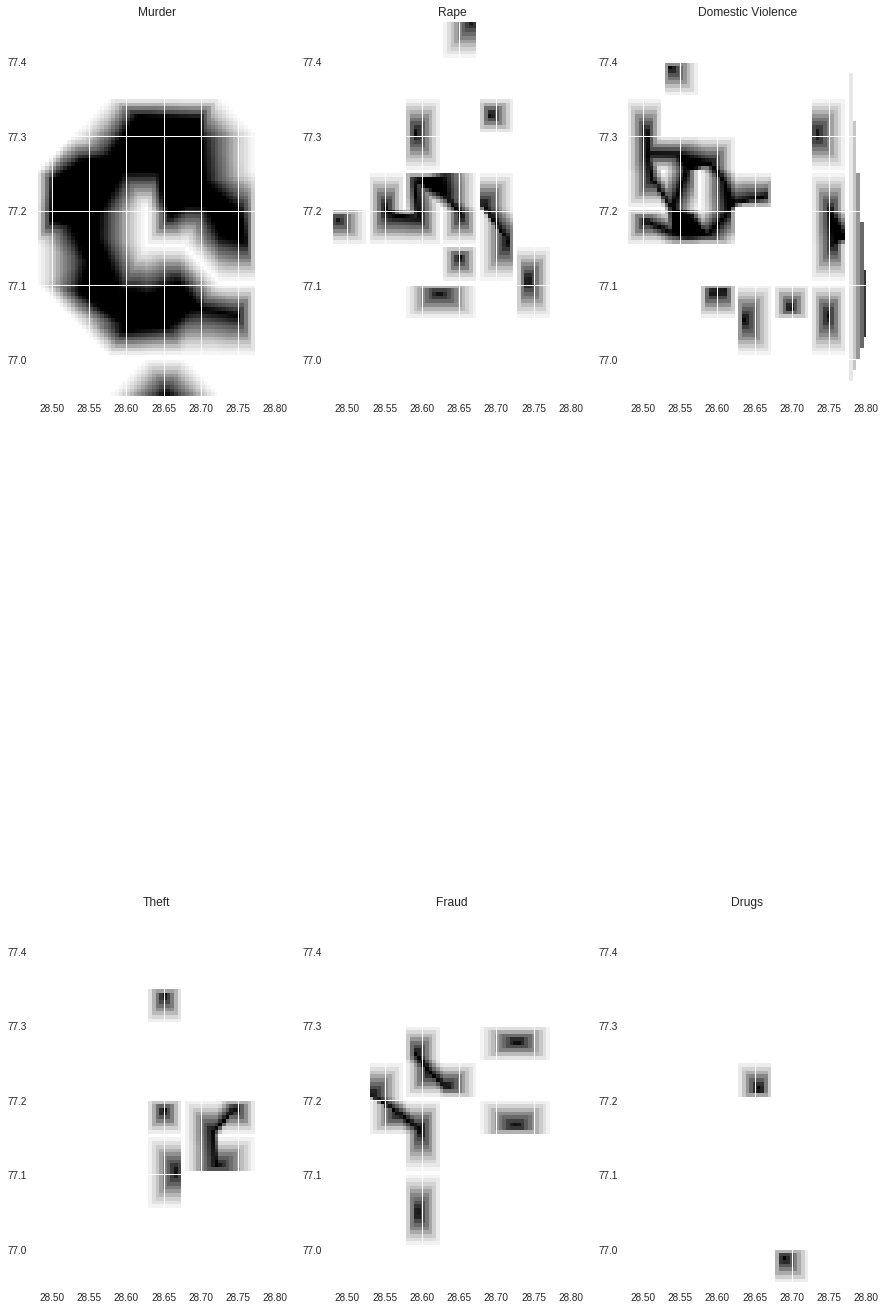

In [8]:
import matplotlib.pyplot as plt
# plt.subplot(221)
# plt.imshow(func(grid_x, grid_y).T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
# plt.plot(Location[:,0], Location[:,1], 'ro', ms=1)
# # plt.plot(lat, long, 'k.', ms=1)


plt.subplot(231)
plt.imshow(gridM.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Murder')


plt.subplot(232)
plt.imshow(gridR.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Rape')


plt.subplot(233)
plt.imshow(gridDV.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Domestic Violence')


plt.subplot(234)
plt.imshow(gridT.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Theft')


plt.subplot(235)
plt.imshow(gridF.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Fraud')


plt.subplot(236)
plt.imshow(gridD.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Drugs')


plt.gcf().set_size_inches(15,30)
plt.show()

In [0]:
def getIntensity(lat,long):
  x = (lat - minLat)/(maxLat - minLat) * len(gridM)
  y = (long - minLong)/(maxLong - minLong) * len(gridM)
  intensity = dict()

  intensity['Murder'] = gridM[round(x)][round(y)] 
  intensity['Rape'] = gridR[round(x)][round(y)] 
  intensity['DomesticViolence'] = gridDV[round(x)][round(y)]
  intensity['Theft'] = gridT[round(x)][round(y)]
  intensity['Fraud'] = gridF[round(x)][round(y)]
  intensity['Drugs'] = gridD[round(x)][round(y)]
  print(intensity)
  print(max(intensity.items(), key=operator.itemgetter(1))[0])
  

In [15]:
getIntensity(28.6122868,77.325467)

{'Murder': 16.738047177702494, 'Rape': 30.513488206446237, 'DomesticViolence': 100.0, 'Theft': 0.0, 'Fraud': 3.986292778594584e-11, 'Drugs': 0.0}
DomesticViolence


In [0]:
import matplotlib.pyplot as plt
plt.plot(lat,long, 'ro')
plt.axis([minLat,maxLat,minLong,maxLong])
plt.show()

In [0]:
np.save('murderModel',gridM)
np.save('rapeModel',gridR)
np.save('domesticModel',gridDV)
np.save('theftModel',gridT)
np.save('fraudModel',gridF)
np.save('drugModel',gridD)

In [0]:
files.download('murderModel.npy')
files.download('rapeModel.npy')
files.download('domesticModel.npy')
files.download('theftModel.npy')
files.download('fraudModel.npy')
files.download('drugModel.npy')

In [0]:
gridM = np.load('murderModel' + '.npy')
gridR = np.load('rapeModel' + '.npy')
gridDV = np.load('domesticModel' + '.npy')
gridT = np.load('theftModel' + '.npy')
gridF = np.load('fraudModel' + '.npy')
gridD = np.load('drugModel' + '.npy')


In [0]:
import json
import pandas

In [0]:
import json

data = {}
data['lat'] = 77
data['lng'] = 22
data['weight'] = 100
json_data = json.dumps(data)

In [0]:
def findLatLong(i,j):
  lat = (i/len(gridM) * (maxLat-minLat)) + minLat
  lng = (j/len(gridM) * (maxLong-minLong)) + minLong
  return lat,lng

In [0]:
data = []
for i in range(0,len(gridM)):
  for j in range(0,len(gridM)):
    lat,lng = findLatLong(i,j)
    weight = (gridM[i][j] + gridR[i][j] + gridDV[i][j] + gridT[i][j] + gridD[i][j] + gridF[i][j])/300
    if weight > 0.4:
      obj = {}
      obj['lat'] = lat
      obj['lng'] = lng
      obj['weight'] = weight
      data += [obj]
    
    

In [0]:
with open('crimeCentre.json', 'w') as outfile:
    json.dump(data,outfile)

In [0]:
files.download('crimeCentre.json')

In [0]:
inputFile = open('MainDataset2.csv', "r")
writeFile =  open('MainDataset3.csv', 'w')
writer = csv.writer(writeFile)

Data = pd.read_csv('MainDataset2.csv')

for row 
